**This notebook contains the Pytorch implementation of GAN on Fashion MNIST dataset .Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.**

**The original MNIST dataset contains a lot of handwritten digits. I also applied GAN on that dataset due to redundancy i'm not going to upload that notebook.I will share result in Readme.md.** 

In [91]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision import datasets
import torch.optim as opt
from torch.autograd import Variable

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Utilizing the GPU
def to_var(x):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x)

# simple scaling method
def denorm(x): 
    out = (x + 1) / 2
    return out.clamp(0, 1)

**1. Simply downloading the FashionMNIST dataset with the help of Pytorch default setting provided in the dataset library , which is actually the second portion of the code.** 

**2. Then transforming the dataset into pytorch tensor data type so we can utilize the GPU.**

In [41]:
transform=transforms.Compose([
    transforms.ToTensor(),
    ])


mnist=datasets.FashionMNIST(
    root="./FashionMNIST/",
    download=True,
    train=True,
    transform=transform 
)

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw





Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw
Processing...
Done!


**Creating mini batches for training of size 64** 

In [0]:
dataloaders=torch.utils.data.DataLoader(mnist,shuffle=True,batch_size=64)

**h1 : size of hidden layer 1**<br>
**h2 : size of hidden layer 2**<br>
**Z  : input size of image or noise**
**It doesn't sounds very good size of layer 1 and layer 2 but it works the best after trying out a lot architecture.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
h1=128
h2=512
Z=100
lr=1e-3

dataiter=iter(dataloaders)
imgs,labels=dataiter.next()
print(imgs.size())
X=imgs.reshape(imgs.size(0),-1).size(1)
print(X)


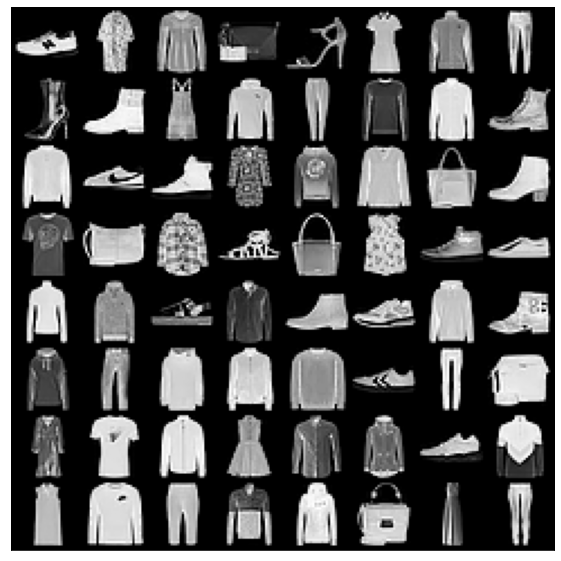

In [45]:
def imshow(imgs):
    imgs=torchvision.utils.make_grid(imgs)
    npimg=imgs.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg,(1,2,0)),cmap="Greys_r")
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
imshow(imgs)

    

In [0]:
def Xav(m):
    if type(m)==nn.Linear:
         nn.init.xavier_uniform_(m.weight)
         m.bias.data.fill_(0)
    

**Building Generetor model** 

In [0]:
class gen(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
                              nn.Linear(Z,h),
                              nn.ReLU(),
                              nn.Linear(h,X),
                              nn.Sigmoid()
            

        )
        
        self.model.apply(Xav)
        
    def forward(self,input):
        return self.model(input)



In [0]:
 G=gen()

**Building Discriminator model** 

In [0]:
class dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
                                     nn.Linear(X,h),
                     nn.ReLU(),
                     nn.Linear(h,1),
                     nn.Sigmoid()
             
         )
        self.model.apply(Xav)
    
    def forward(self,input):
        return self.model(input)
  

In [50]:
D=dis()
print(D)

dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [0]:
if torch.cuda.is_available():
  D.cuda()
  G.cuda()

In [0]:
optimizer_D=opt.Adam(D.parameters(),lr=.0003)
optimizer_G=opt.Adam(G.parameters(),lr=.0003)
criterion = nn.BCELoss()

**Training the model**

Epoch=0,G_loss=1.027206756921211,D_loss=1.1449145740156235,time=0.13501754999160767min


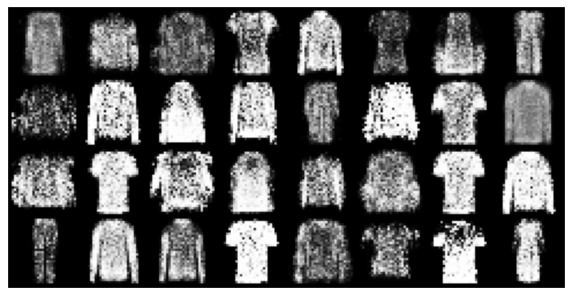

Epoch=50,G_loss=1.0116261778228572,D_loss=1.1431417424541546,time=6.82964383761088min


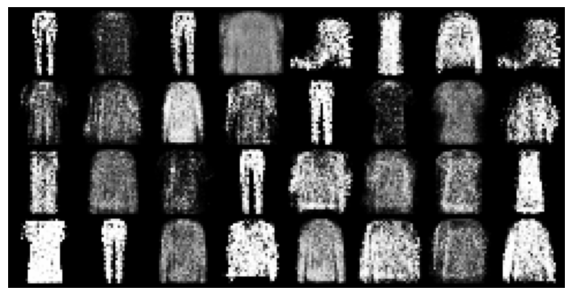

Epoch=100,G_loss=1.0105156745356538,D_loss=1.1113568656861401,time=13.591874408721925min


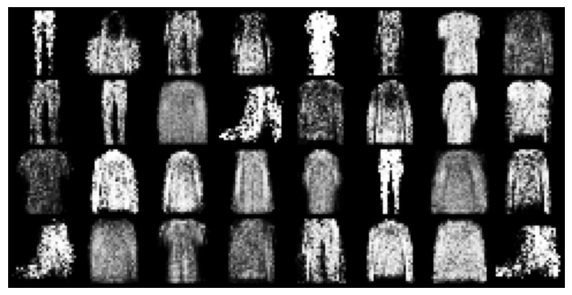

Epoch=150,G_loss=0.9932503477850957,D_loss=1.1107916722038407,time=20.4153427084287min


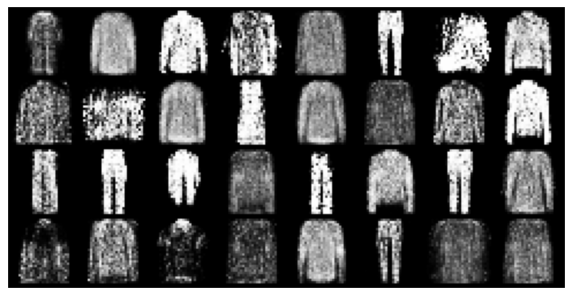

Epoch=200,G_loss=1.0314245314867512,D_loss=1.0898658781290562,time=27.28383538722992min


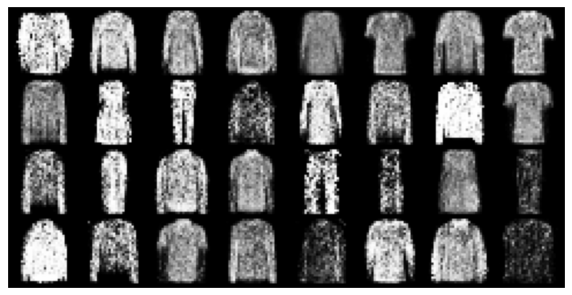

Epoch=250,G_loss=1.0344377757389662,D_loss=1.076095833135312,time=34.13193701108297min


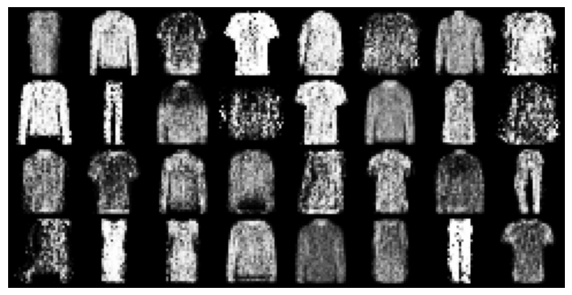

Epoch=300,G_loss=1.025345465267645,D_loss=1.0810947392159687,time=41.01963437795639min


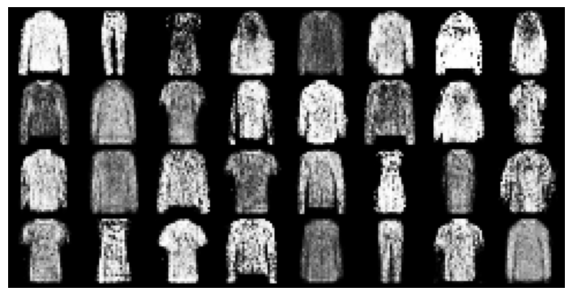

Epoch=350,G_loss=1.0255549557681785,D_loss=1.0764066032382216,time=47.912975366910295min


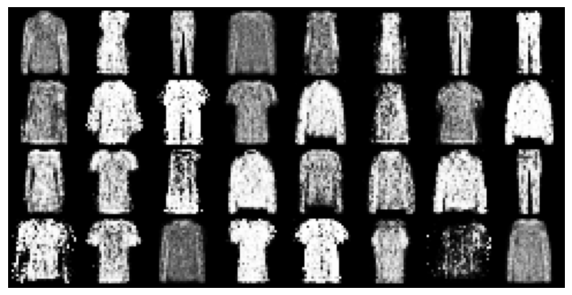

Epoch=400,G_loss=1.0125751998632955,D_loss=1.0839990421271781,time=54.77079080343246min


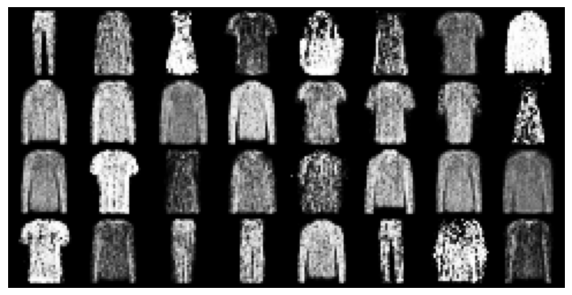

Epoch=450,G_loss=1.0105204955219969,D_loss=1.0819218778279798,time=61.669770896434784min


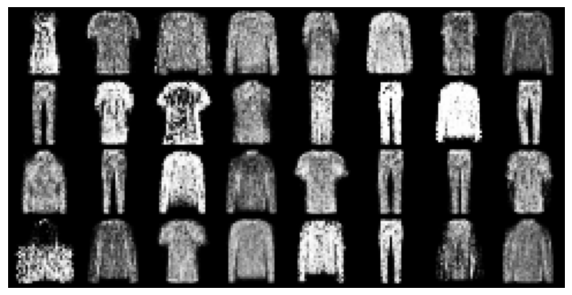

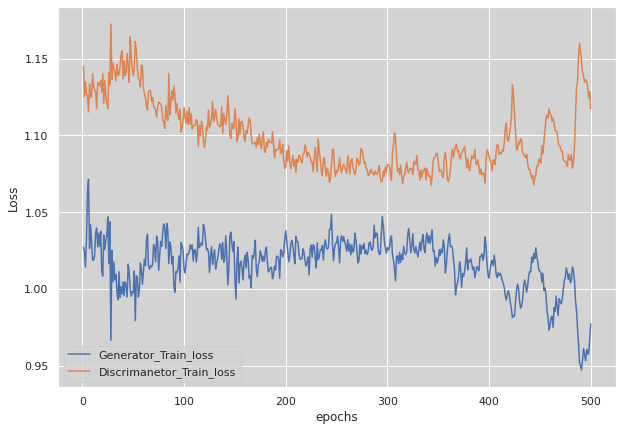

<Figure size 432x288 with 0 Axes>

In [96]:
from torchvision.utils import save_image
import time
g_progress=[]
d_progress=[]
c=0
time_begin=time.time()
for epoch in range(500):
    G_loss_run=0.
    D_loss_run=0.
    for i,(images,_) in enumerate(dataloaders):
              bs=images.size(0)
              images = to_var(images.view(images.size(0), -1))
              
              z=to_var(torch.randn(bs,Z))
              real_label=to_var(torch.ones(bs,1))
              fake_label=to_var(torch.zeros(bs,1))
              D_real=D(images)
              D_fake=D(G(z))

              D_real_loss=criterion(D_real,real_label)
              D_fake_loss=criterion(D_fake,fake_label)
              D_loss=D_real_loss+D_fake_loss
              optimizer_D.zero_grad()
              D.zero_grad()
              D_loss.backward()
              optimizer_D.step()

              z=to_var(torch.randn(bs,Z))
              D_fake=D(G(z))
              G_loss=criterion(D_fake,real_label)
              optimizer_G.zero_grad()
              D.zero_grad()
              G.zero_grad()
              G_loss.backward()
              optimizer_G.step()

              G_loss_run +=G_loss.item()
              D_loss_run +=D_loss.item()

    g_progress.append(G_loss_run/(i+1))
    d_progress.append(D_loss_run/(i+1))
    if epoch%50==0:
      time_end=time.time()
      print("Epoch={},G_loss={},D_loss={},time={}min".format(epoch,G_loss_run/(i+1),D_loss_run/(i+1),((time_end-time_begin)/60)))

    sample=G(z).detach() 
    sample=sample.cpu()
    sample=sample.view(sample.size(0),1,28,28)

    if epoch%50==0:
      imshow(sample)
    c=c+1
    save_image(sample,"./gan/"+str(c)+".png")

fig,ax=plt.subplots(figsize=(10,7))
ax.plot(np.arange(1, 501, 1),np.asarray(g_progress), label='Generator_Train_loss')
ax.set_xlabel("epochs")
ax.set_ylabel("Loss")
ax.plot(np.arange(1, 501, 1),np.asarray(d_progress), label='Discrimanetor_Train_loss')
ax.legend()
plt.show()
plt.savefig('MNIST_GAN_loss.png')


**There is an important thing to look at the graph that after certain time the Discriminator loss and generator loss is not the true measrue how well the model is performing**